In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals


%load_ext tensorboard
%reload_ext tensorboard
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import datetime
import os
import copy

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_labels = None
train_images = None
test_labels = None
test_images = None
class_names = None
history = None

In [3]:
def processDataset():
    global train_labels
    global train_images
    global test_labels
    global test_images
    global class_names
    
    (train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()
    
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
    
    train_images = train_images / 255.0
    test_images = test_images / 255.0
    
print(train_labels)
processDataset()
print(train_labels)


None
[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


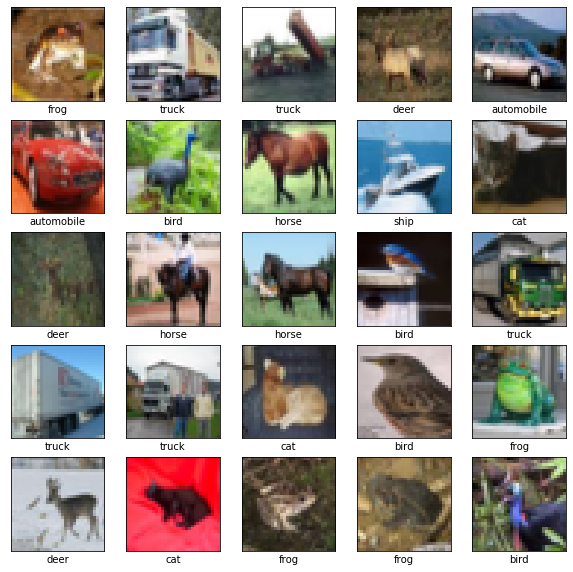

In [4]:
def showDataset():
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()
    
showDataset()

In [5]:
def evaluateModel(model):
    test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
    print('Acc: ' + str(test_acc))
    print('Loss:' + str(test_loss))

In [6]:
def showPredictions(model):
    probability_model = keras.Sequential([model, keras.layers.Softmax()])
    predictions = probability_model.predict(test_images)
    
    num_rows = 5
    num_cols = 3
    num_images = num_rows*num_cols
    
    
    
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
      plt.subplot(num_rows, 2*num_cols, 2*i+1)
      plot_image(i, predictions[i], test_labels, test_images)
      plt.subplot(num_rows, 2*num_cols, 2*i+2)
      plot_value_array(i, predictions[i], test_labels)
    plt.tight_layout()
    plt.show()


    
    
    
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label[0]]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label[0]].set_color('blue')


In [7]:
def showLoss():
    plt.figure(2)
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim([0, 2])
    plt.legend(loc='upper right')

In [8]:
def showAccuracy():
    plt.figure(1)
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')

In [9]:
def trainModelAdam(model, epochCount):
    global history
    
    model.summary()
    
    log_dir = os.path.join(
    "logs",
    "final",
    datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
    )
    tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1)
    %tensorboard --logdir logs/fit
    #model.build()
    
    model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    history = model.fit(train_images, train_labels, epochs=epochCount, 
                    validation_data=(test_images, test_labels), callbacks=[tensorboard_callback])
    
    evaluateModel(model)
    showPredictions(model)
    showAccuracy()
    showLoss()
    
    

In [10]:
def trainModelCustomAdam(model, epochCount):
    global history
    
    model.summary()
    
    log_dir = os.path.join(
    "logs",
    "final",
    datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
    )
    tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1)
    %tensorboard --logdir logs/fit
    #model.build()
    
    opt = keras.optimizers.Adam(learning_rate = 0.002)
    
    
    model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
    
    history = model.fit(train_images, train_labels, epochs=epochCount, 
                    validation_data=(test_images, test_labels), callbacks=[tensorboard_callback])
    
    evaluateModel(model)
    showPredictions(model)
    showAccuracy()
    showLoss()
    
    

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          3

Reusing TensorBoard on port 6006 (pid 1164), started 1 day, 21:22:05 ago. (Use '!kill 1164' to kill it.)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 242us/sample - loss: 1.5345 - accuracy: 0.4387 - val_loss: 1.2413 - val_accuracy: 0.5540
Epoch 2/50
50000/50000 [==============================] - 11s 216us/sample - loss: 1.1853 - accuracy: 0.5791 - val_loss: 1.0957 - val_accuracy: 0.6199
Epoch 3/50
50000/50000 [==============================] - 11s 212us/sample - loss: 1.0338 - accuracy: 0.6359 - val_loss: 1.0266 - val_accuracy: 0.6448
Epoch 4/50
50000/50000 [==============================] - 10s 200us/sample - loss: 0.9305 - accuracy: 0.6731 - val_loss: 0.9597 - val_accuracy: 0.6688
Epoch 5/50
50000/50000 [==============================] - 10s 195us/sample - loss: 0.8559 - accuracy: 0.6999 - val_loss: 0.9172 - val_accuracy: 0.6851
Epoch 6/50
50000/50000 [==============================] - 10s 193us/sample - loss: 0.7984 - accuracy: 0.7191 - val_loss: 0.9062 - val_accuracy: 0.6901
Epoch 7/50
50000/50000 [====================

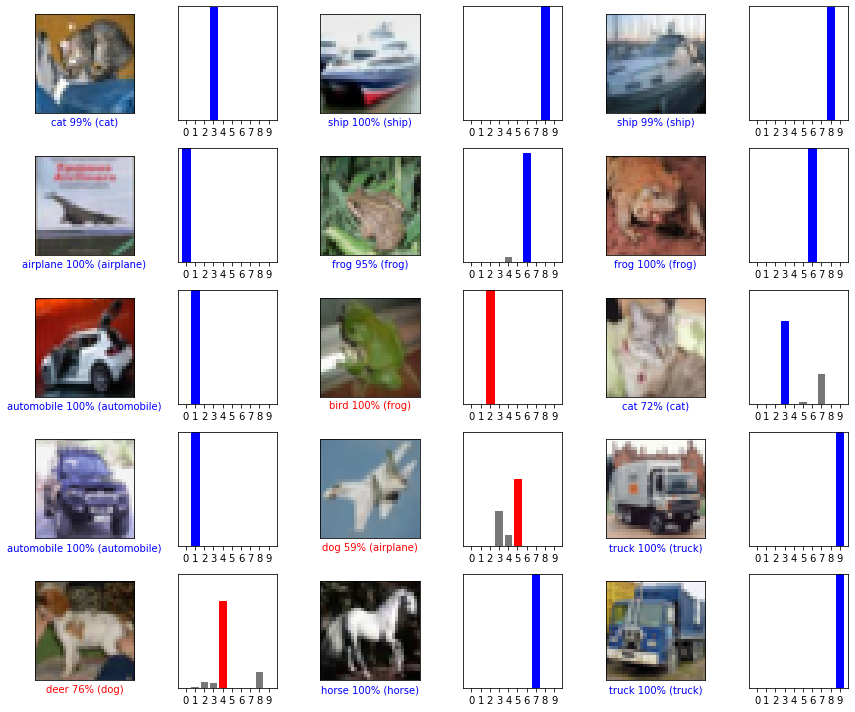

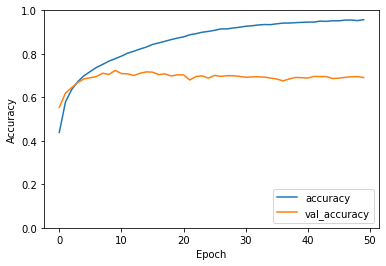

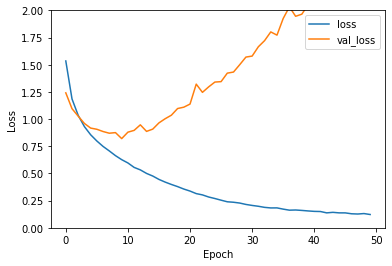

In [11]:
testModel1 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10)
])

trainModelAdam(testModel1, 50)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_5 (Activation)    (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)         

Reusing TensorBoard on port 6006 (pid 1164), started 1 day, 21:30:29 ago. (Use '!kill 1164' to kill it.)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 212us/sample - loss: 1.4942 - accuracy: 0.4569 - val_loss: 1.2543 - val_accuracy: 0.5530
Epoch 2/50
50000/50000 [==============================] - 10s 209us/sample - loss: 1.1328 - accuracy: 0.6005 - val_loss: 1.0814 - val_accuracy: 0.6201
Epoch 3/50
50000/50000 [==============================] - 10s 208us/sample - loss: 1.0042 - accuracy: 0.6451 - val_loss: 0.9902 - val_accuracy: 0.6505
Epoch 4/50
50000/50000 [==============================] - 10s 195us/sample - loss: 0.9163 - accuracy: 0.6784 - val_loss: 0.9600 - val_accuracy: 0.6646
Epoch 5/50
50000/50000 [==============================] - 10s 194us/sample - loss: 0.8547 - accuracy: 0.6986 - val_loss: 0.9459 - val_accuracy: 0.6773
Epoch 6/50
50000/50000 [==============================] - 10s 198us/sample - loss: 0.8083 - accuracy: 0.7150 - val_loss: 0.9976 - val_accuracy: 0.6661
Epoch 7/50
50000/50000 [====================

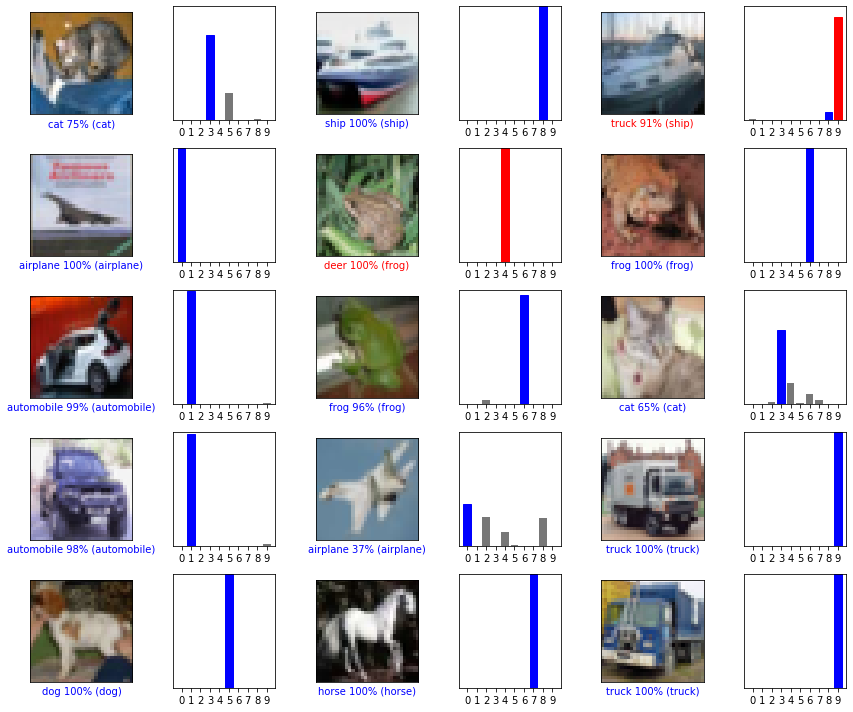

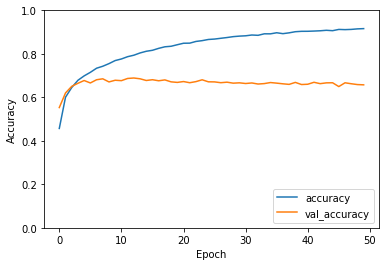

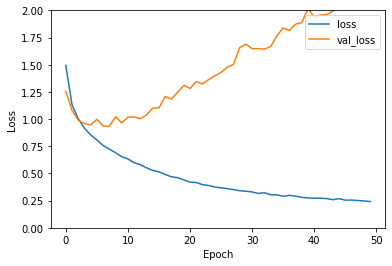

In [12]:
testModel1 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10)
])

trainModelCustomAdam(testModel1, 50)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_9 (Activation)    (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)         

Reusing TensorBoard on port 6006 (pid 1164), started 1 day, 21:38:37 ago. (Use '!kill 1164' to kill it.)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 216us/sample - loss: 1.8012 - accuracy: 0.3321 - val_loss: 1.4364 - val_accuracy: 0.4810
Epoch 2/50
50000/50000 [==============================] - 10s 201us/sample - loss: 1.4648 - accuracy: 0.4725 - val_loss: 1.2345 - val_accuracy: 0.5642
Epoch 3/50
50000/50000 [==============================] - 10s 202us/sample - loss: 1.3301 - accuracy: 0.5300 - val_loss: 1.2750 - val_accuracy: 0.5412
Epoch 4/50
50000/50000 [==============================] - 10s 199us/sample - loss: 1.2473 - accuracy: 0.5611 - val_loss: 1.1182 - val_accuracy: 0.6064
Epoch 5/50
50000/50000 [==============================] - 10s 200us/sample - loss: 1.1774 - accuracy: 0.5900 - val_loss: 1.0228 - val_accuracy: 0.6443
Epoch 6/50
50000/50000 [==============================] - 10s 203us/sample - loss: 1.1298 - accuracy: 0.6074 - val_loss: 0.9783 - val_accuracy: 0.6515
Epoch 7/50
50000/50000 [====================

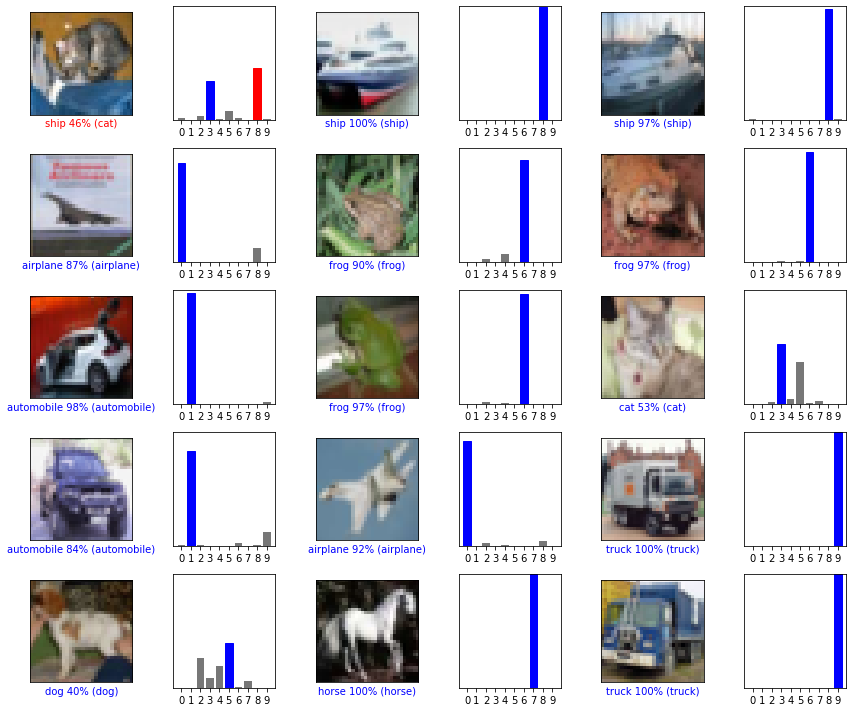

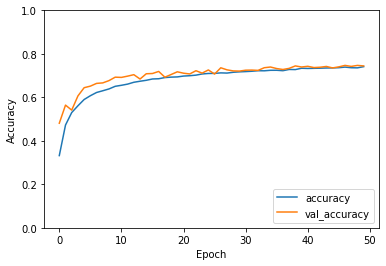

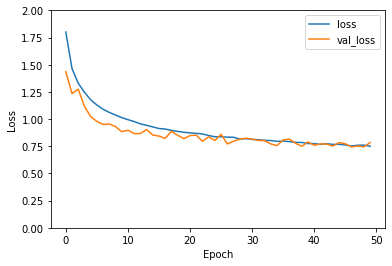

In [13]:
testModel2 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10)
])

trainModelAdam(testModel2, 50)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
activation_12 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_13 (Activation)   (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)         

Reusing TensorBoard on port 6006 (pid 1164), started 1 day, 21:47:06 ago. (Use '!kill 1164' to kill it.)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 219us/sample - loss: 1.7965 - accuracy: 0.3305 - val_loss: 1.4105 - val_accuracy: 0.4975
Epoch 2/50
50000/50000 [==============================] - 10s 200us/sample - loss: 1.5050 - accuracy: 0.4580 - val_loss: 1.4543 - val_accuracy: 0.4994
Epoch 3/50
50000/50000 [==============================] - 10s 202us/sample - loss: 1.4223 - accuracy: 0.4905 - val_loss: 1.3893 - val_accuracy: 0.5178
Epoch 4/50
50000/50000 [==============================] - 10s 197us/sample - loss: 1.3747 - accuracy: 0.5136 - val_loss: 1.1816 - val_accuracy: 0.5804
Epoch 5/50
50000/50000 [==============================] - 10s 202us/sample - loss: 1.3303 - accuracy: 0.5267 - val_loss: 1.1691 - val_accuracy: 0.5837
Epoch 6/50
50000/50000 [==============================] - 10s 200us/sample - loss: 1.2973 - accuracy: 0.5427 - val_loss: 1.3165 - val_accuracy: 0.5471
Epoch 7/50
50000/50000 [====================

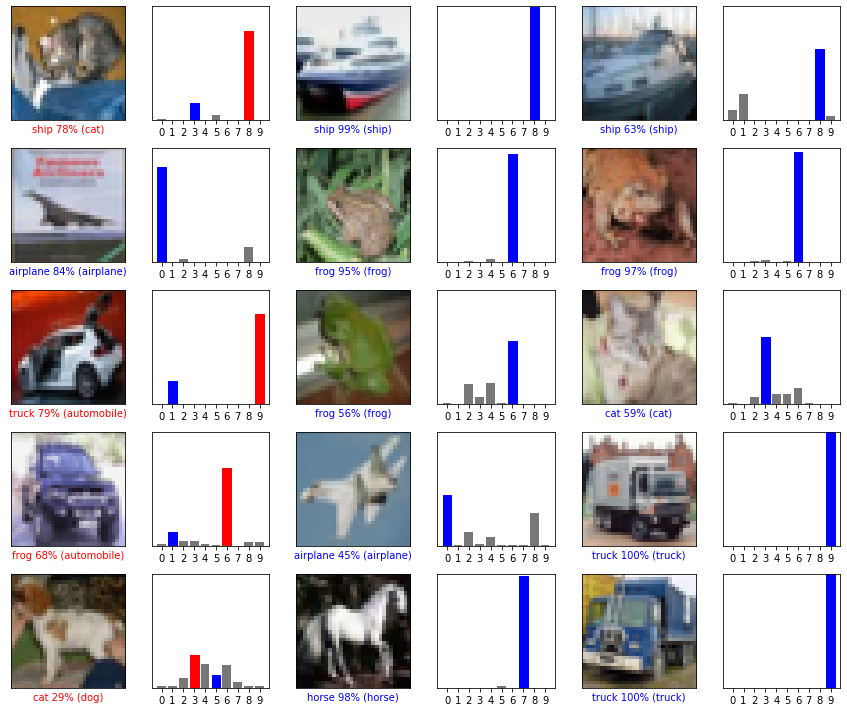

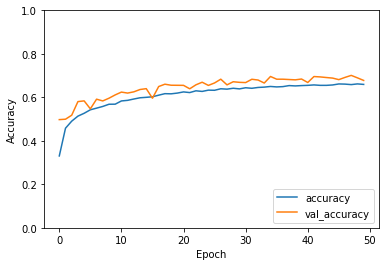

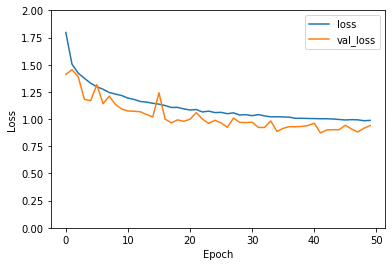

In [14]:
testModel2 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10)
])

trainModelCustomAdam(testModel2, 50)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                196672    
_________________________________________________________________
activation_16 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 197,322
Trainable params: 197,322
Non-trainable params: 0
_________________________________________________________________


Reusing TensorBoard on port 6006 (pid 1164), started 1 day, 21:55:49 ago. (Use '!kill 1164' to kill it.)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 183us/sample - loss: 1.9802 - accuracy: 0.2688 - val_loss: 1.9226 - val_accuracy: 0.2925
Epoch 2/50
50000/50000 [==============================] - 7s 135us/sample - loss: 1.8706 - accuracy: 0.3180 - val_loss: 1.8367 - val_accuracy: 0.3270
Epoch 3/50
50000/50000 [==============================] - 7s 142us/sample - loss: 1.8421 - accuracy: 0.3312 - val_loss: 1.8238 - val_accuracy: 0.3362
Epoch 4/50
50000/50000 [==============================] - 8s 151us/sample - loss: 1.8288 - accuracy: 0.3362 - val_loss: 1.8032 - val_accuracy: 0.3478
Epoch 5/50
50000/50000 [==============================] - 7s 139us/sample - loss: 1.8016 - accuracy: 0.3509 - val_loss: 1.7866 - val_accuracy: 0.3555
Epoch 6/50
50000/50000 [==============================] - 7s 142us/sample - loss: 1.7927 - accuracy: 0.3556 - val_loss: 1.7846 - val_accuracy: 0.3568
Epoch 7/50
50000/50000 [==========================

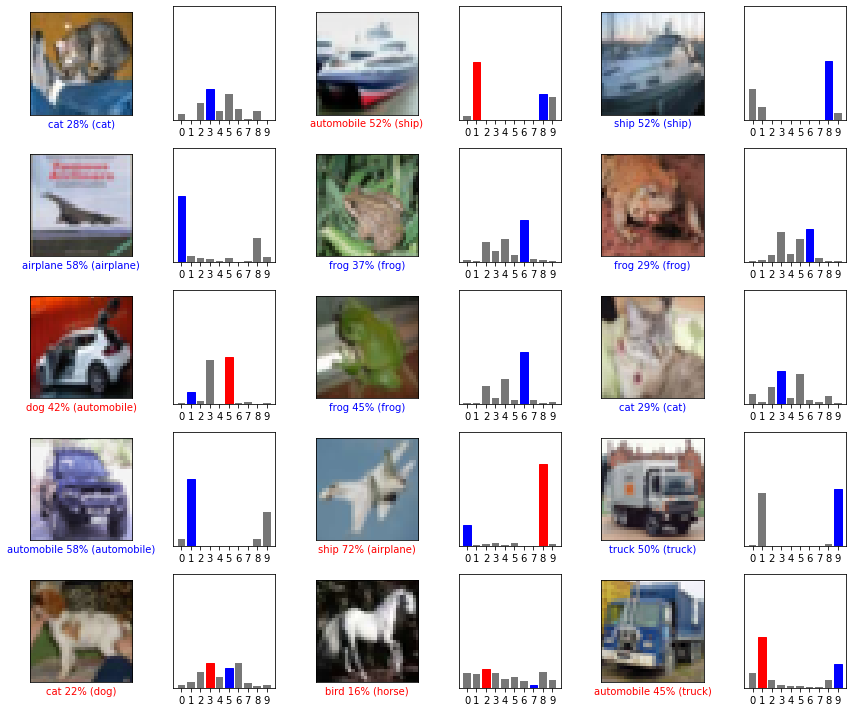

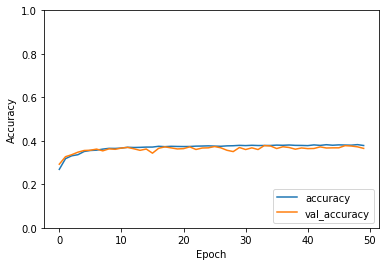

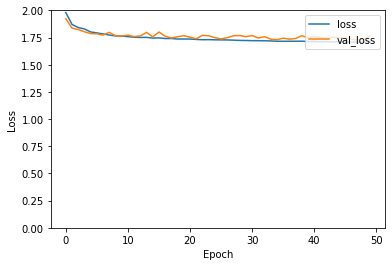

In [15]:
testModel3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10)
])

trainModelAdam(testModel3, 50)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                196672    
_________________________________________________________________
activation_17 (Activation)   (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 197,322
Trainable params: 197,322
Non-trainable params: 0
_________________________________________________________________


Reusing TensorBoard on port 6006 (pid 1164), started 1 day, 22:02:40 ago. (Use '!kill 1164' to kill it.)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 159us/sample - loss: 1.9976 - accuracy: 0.2617 - val_loss: 1.8910 - val_accuracy: 0.3029
Epoch 2/50
50000/50000 [==============================] - 7s 146us/sample - loss: 1.8852 - accuracy: 0.3145 - val_loss: 1.8532 - val_accuracy: 0.3257
Epoch 3/50
50000/50000 [==============================] - 8s 153us/sample - loss: 1.8539 - accuracy: 0.3260 - val_loss: 1.8456 - val_accuracy: 0.3219
Epoch 4/50
50000/50000 [==============================] - 8s 154us/sample - loss: 1.8380 - accuracy: 0.3301 - val_loss: 1.8145 - val_accuracy: 0.3391
Epoch 5/50
50000/50000 [==============================] - 8s 160us/sample - loss: 1.8266 - accuracy: 0.3328 - val_loss: 1.8467 - val_accuracy: 0.3243
Epoch 6/50
50000/50000 [==============================] - 8s 158us/sample - loss: 1.8189 - accuracy: 0.3347 - val_loss: 1.8085 - val_accuracy: 0.3367
Epoch 7/50
50000/50000 [==========================

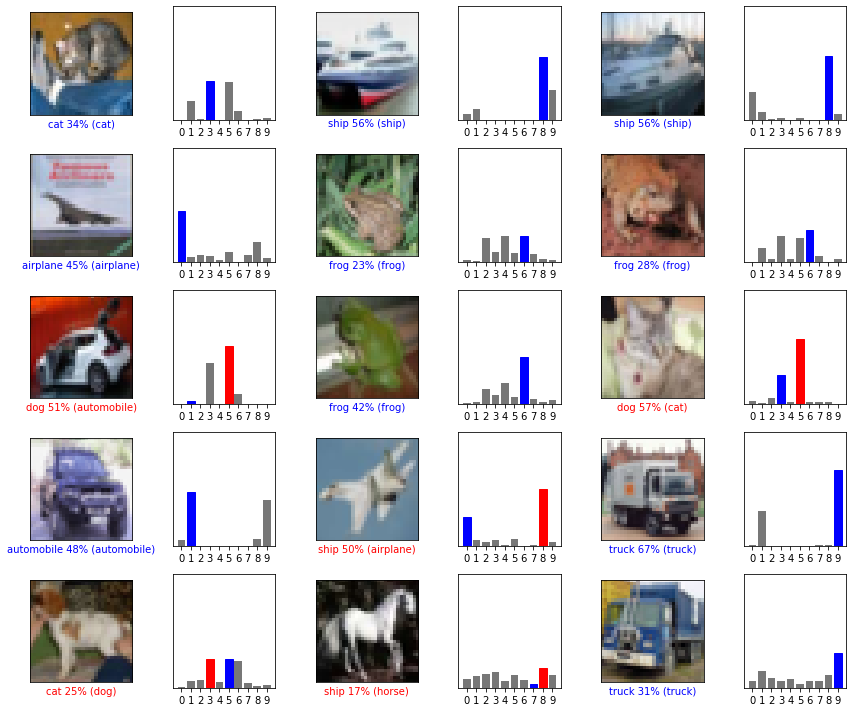

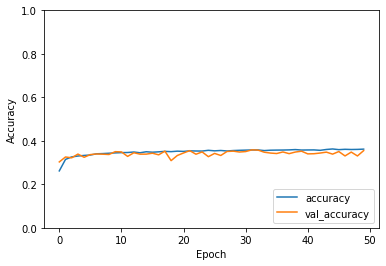

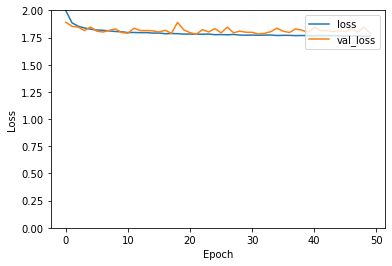

In [16]:
testModel3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64),
    keras.layers.Activation('relu'),
    keras.layers.Dense(10)
])

trainModelCustomAdam(testModel3, 50)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
activation_18 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_19 (Activation)   (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 64)        

Reusing TensorBoard on port 6006 (pid 1164), started 1 day, 22:13:26 ago. (Use '!kill 1164' to kill it.)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 222us/sample - loss: 1.4011 - accuracy: 0.5044 - val_loss: 1.1851 - val_accuracy: 0.5813
Epoch 2/50
50000/50000 [==============================] - 10s 199us/sample - loss: 1.1094 - accuracy: 0.6144 - val_loss: 1.1150 - val_accuracy: 0.6118
Epoch 3/50
50000/50000 [==============================] - 11s 214us/sample - loss: 1.0175 - accuracy: 0.6463 - val_loss: 1.0750 - val_accuracy: 0.6287
Epoch 4/50
50000/50000 [==============================] - 11s 215us/sample - loss: 0.9592 - accuracy: 0.6658 - val_loss: 1.0248 - val_accuracy: 0.6526
Epoch 5/50
50000/50000 [==============================] - 10s 206us/sample - loss: 0.9044 - accuracy: 0.6872 - val_loss: 1.1296 - val_accuracy: 0.6059
Epoch 6/50
50000/50000 [==============================] - 10s 205us/sample - loss: 0.8582 - accuracy: 0.7023 - val_loss: 0.9957 - val_accuracy: 0.6563
Epoch 7/50
50000/50000 [====================

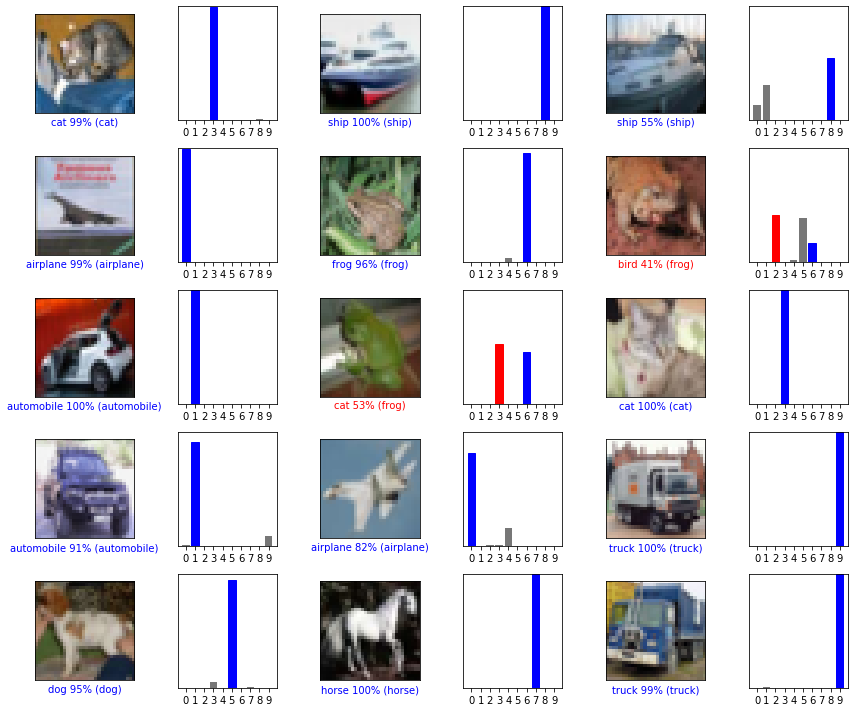

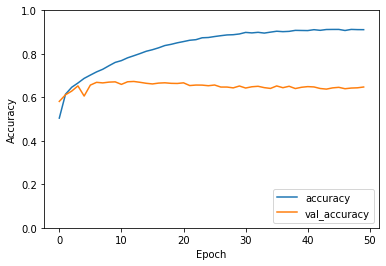

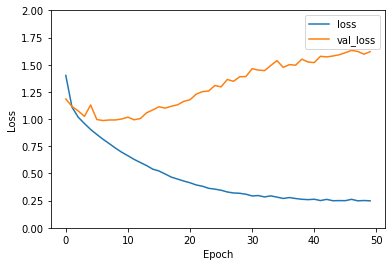

In [17]:
testModel1 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dense(10)
])

trainModelAdam(testModel1, 50)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
activation_22 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
activation_23 (Activation)   (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 64)        

Reusing TensorBoard on port 6006 (pid 1164), started 1 day, 22:22:25 ago. (Use '!kill 1164' to kill it.)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 254us/sample - loss: 1.4408 - accuracy: 0.4882 - val_loss: 1.2805 - val_accuracy: 0.5433
Epoch 2/50
50000/50000 [==============================] - 10s 208us/sample - loss: 1.2384 - accuracy: 0.5649 - val_loss: 1.2910 - val_accuracy: 0.5463
Epoch 3/50
50000/50000 [==============================] - 10s 194us/sample - loss: 1.1725 - accuracy: 0.5887 - val_loss: 1.2608 - val_accuracy: 0.5594
Epoch 4/50
50000/50000 [==============================] - 11s 220us/sample - loss: 1.1180 - accuracy: 0.6069 - val_loss: 1.1215 - val_accuracy: 0.6060
Epoch 5/50
50000/50000 [==============================] - 10s 197us/sample - loss: 1.0802 - accuracy: 0.6200 - val_loss: 1.1323 - val_accuracy: 0.6023
Epoch 6/50
50000/50000 [==============================] - 10s 200us/sample - loss: 1.0484 - accuracy: 0.6325 - val_loss: 1.1190 - val_accuracy: 0.6086
Epoch 7/50
50000/50000 [====================

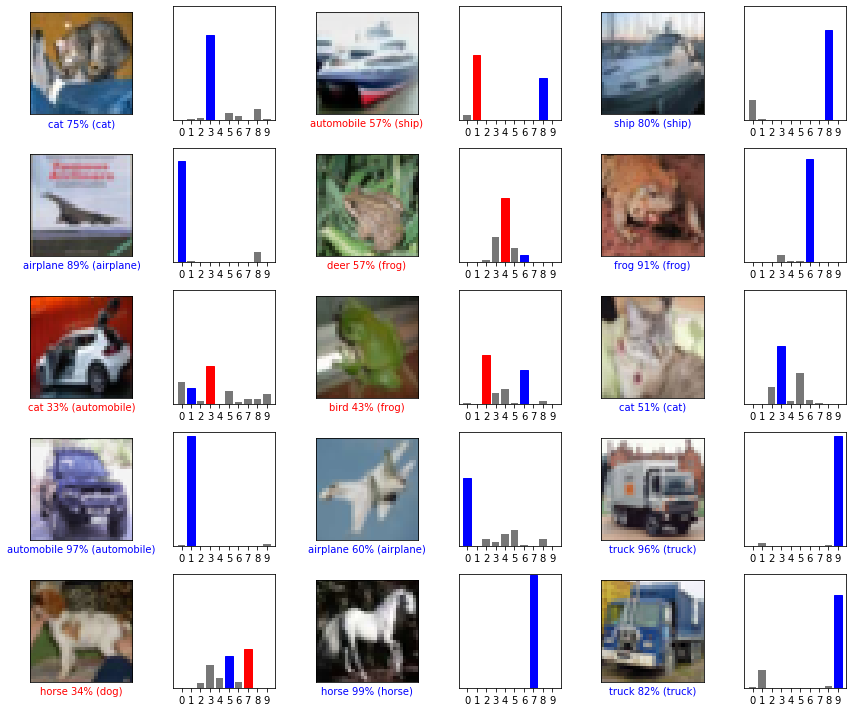

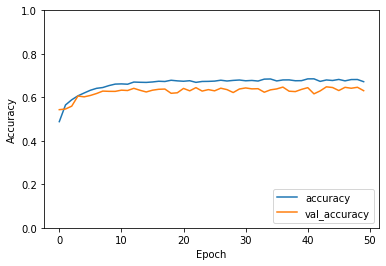

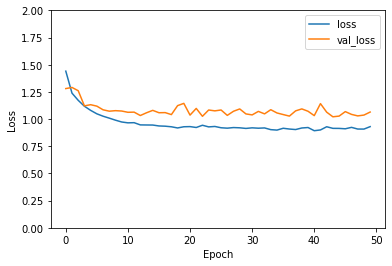

In [18]:
testModel1 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dense(10)
])

trainModelCustomAdam(testModel1, 50)

In [ ]:
testModel2 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10)
])

trainModelAdam(testModel2, 50)

In [ ]:
testModel2 = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), input_shape=(32, 32, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Conv2D(64, (3, 3)),
    keras.layers.Activation('tanh'),
    keras.layers.Flatten(),
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10)
])

trainModelCustomAdam(testModel2, 50)

In [ ]:
testModel3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dense(10)
])

trainModelAdam(testModel3, 50)

In [ ]:
testModel3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64),
    keras.layers.Activation('tanh'),
    keras.layers.Dense(10)
])

trainModelCustomAdam(testModel3, 50)